# Energy Materials: Design, Discovery and Data

## 1. Semiconductor Chemistry and Physics

![](./images/semiconductor.png)
<center>From [Fundamentals of Semiconductors](https://books.google.co.uk/books?id=W9pdJZoAeyEC&redir_esc=y) (Yu and Cardona)</center>

## Advance Reading
Read [Principles of Chemical Bonding and Band Gap Engineering in Hybrid Organic−Inorganic Halide Perovskites](http://pubs.acs.org/doi/abs/10.1021/jp512420b) (Journal of Physical Chemistry C, 2015)

## Lecture Slides 
On [Speakerdeck](https://speakerdeck.com/aronwalsh)

In [ ]:
%%HTML 
<script async class="speakerdeck-embed" data-id="a28bbc1a54ae45508aca43ca981d4872" data-ratio="1.33333333333333" src="//speakerdeck.com/assets/embed.js"></script>

## pyExample: Electronic Band Diagrams

Example adapted from http://pythonhosted.org/eq_band_diagram/ using a [Poisson-Boltzmann equation](https://en.wikipedia.org/wiki/Poisson–Boltzmann_equation) solver via finite differences. 

### Python Setup

In [2]:
import sys
assert sys.version_info >= (3,4)
import eq_band_diagram as bandy
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Define Materials Properties

In [5]:
MAPI = bandy.Material(NC=8e18, #conduction density of states /cm3
                NV=6e18, #valence density of states /cm3
                EG=1.6, #band gap in eV
                chi=3.9, #electron affinity in eV
                eps=1, #static dielectric constant in epsilon_0
                name='MAPI')

TiO2 = bandy.Material(NC=2e17,
                NV=6e17,
                EG=3.2,
                chi=4.2,
                eps=10,
                name='TiO2')

Cu2O = bandy.Material(NC=2e17,
                NV=1e19,
                EG=2.2,
                chi=3.2,
                eps=7,
                name='Cu2O')

### p-n Junction

Met convergence criterion after 1135 iterations.


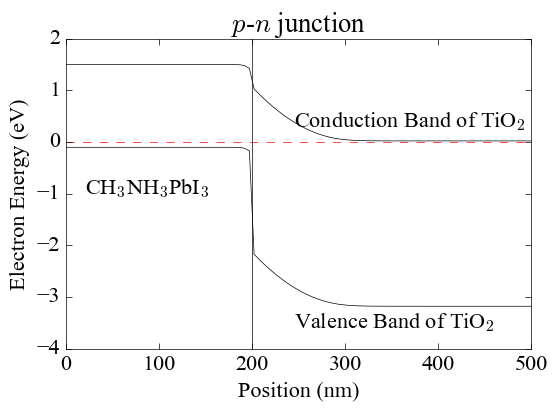

In [6]:
# Build layers
layer0 = bandy.Layer(matl=MAPI, n_or_p='p', doping=1e17, thickness=200) #thickness in nm
layer1 = bandy.Layer(matl=TiO2, n_or_p='n', doping=1e17, thickness=300)
layers = [layer0, layer1]

turing = bandy.calc_layer_stack(layers, num_points=100, tol=1e-6, max_iterations=inf)
bandy.plot_bands(turing, layers)

# Make a pretty plot
fontSize = 16
mpl.rc('font', **{ 'family' : 'serif', 'size' : fontSize, 'serif' : 'Times New Roman' })
mpl.rc('lines', **{ 'linewidth' : 0.5 })
axes = plt.gca()
for spine in axes.spines.values():
    spine.set_linewidth(0.5)
xlabel("Position (nm)")
ylabel("Electron Energy (eV)")
title("$p$-$n$ junction")

# Add some labels
annotate("Conduction Band of TiO$_2$", xy=(245, 0.3), xytext=(245, 0.3))
annotate("Valence Band of TiO$_2$", xy=(245, -3.6), xytext=(245, -3.6))
annotate("CH$_3$NH$_3$PbI$_3$", xy=(20, -1), xytext=(20, -1))

### p-i-n Junction

Met convergence criterion after 7280 iterations.


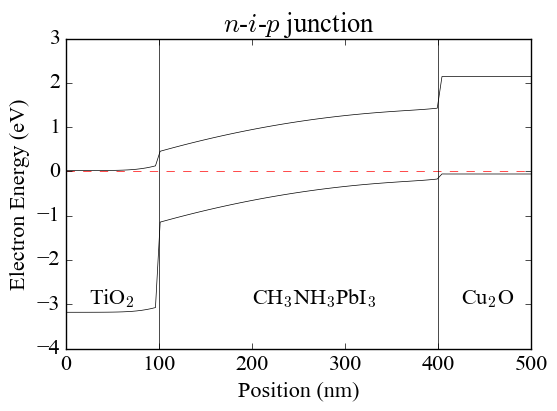

In [7]:
# Build layers
layer0 = bandy.Layer(matl=MAPI, n_or_p='p', doping=1e15, thickness=300) 
layer1 = bandy.Layer(matl=TiO2, n_or_p='n', doping=1e17, thickness=100)
layer2 = bandy.Layer(matl=Cu2O, n_or_p='p', doping=1e18, thickness=100)
layers = [layer1, layer0, layer2]

turing = bandy.calc_layer_stack(layers, num_points=100, tol=1e-6, max_iterations=inf)
bandy.plot_bands(turing, layers)

# Plot setup
xlabel("Position (nm)")
ylabel("Electron Energy (eV)")
title("$n$-$i$-$p$ junction")
annotate("TiO$_2$", xy=(25, -3), xytext=(25, -3))
annotate("Cu$_2$O", xy=(425, -3), xytext=(425, -3))
annotate("CH$_3$NH$_3$PbI$_3$", xy=(200, -3), xytext=(200, -3))

## Supplementary Links 

* [How Chemistry and Physics Meet in the Solid State](http://onlinelibrary.wiley.com/doi/10.1002/anie.198708461/full)  (Angewandte Chemie, 1987)
* [Cambridge Dielectrics](http://www.doitpoms.ac.uk/tlplib/dielectrics/index.php)
* [Cambridge Semiconductors](http://www.doitpoms.ac.uk/tlplib/semiconductors/index.php)
* [Cambridge Crystallography](http://www.doitpoms.ac.uk/tlplib/crystallography3/index.php)
* [Video series on solid state physics](https://www.youtube.com/channel/UCFgtgeXkgWr1MsOTftce5BA)

In [ ]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/aHhCKWkKjPw" frameborder="0" allowfullscreen></iframe>